In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [2]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [3]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [4]:
s_one

In [5]:
def expected_distribution_opening_round(player, opponent):
    """
    Returns


    the first state of two staregies gven that they are written as vectors and the first element
    is the probability of cooperating in the oppening move.

    For example:
    s_1 = (y_1, p_1, q_1)

    or

    s_1 = (y_1, p_1, p_2, p_3, p_4)
    """

    cc_probability = player[0] * opponent[0]
    cd_probability = player[0] * (1 - opponent[0])
    dc_probability = (1 - player[0]) * opponent[0]
    dd_probability = (1 - player[0]) * (1 - opponent[0])

    return (cc_probability, cd_probability, dc_probability, dd_probability)

**tests**

In [6]:
expected_distribution_opening_round(s_one, s_two)

In [7]:
expected_distribution_opening_round((0, 0, 0), (0, 0, 0))

In [8]:
expected_distribution_opening_round((1, 0, 0), (1, 0, 0))

In [9]:
expected_distribution_opening_round((1, 0, 0), (0, 0, 0))

In [10]:
expected_distribution_opening_round((0, 0, 0), (1, 0, 0))

In [11]:
def markov_chain_for_reactive_strategies(player, opponent):
    """
    Returns a Markov transition matrix for a game of reactive strategies.
    """
    return np.array(
        [
            [
                player[1] * opponent[1],
                player[1] * (1 - opponent[1]),
                opponent[1] * (1 - player[1]),
                (1 - player[1]) * (1 - opponent[1]),
            ],
            [
                opponent[1] * player[2],
                player[2] * (1 - opponent[1]),
                opponent[1] * (1 - player[2]),
                (1 - opponent[1]) * (1 - player[2]),
            ],
            [
                player[1] * opponent[2],
                player[1] * (1 - opponent[2]),
                opponent[2] * (1 - player[1]),
                (1 - player[1]) * (1 - opponent[2]),
            ],
            [
                player[2] * opponent[2],
                player[2] * (1 - opponent[2]),
                opponent[2] * (1 - player[2]),
                (1 - player[2]) * (1 - opponent[2]),
            ],
        ],
    )

**test**

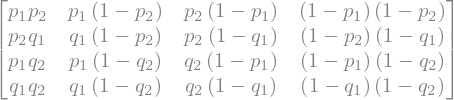

In [12]:
sym.Matrix(markov_chain_for_reactive_strategies(s_one, s_two))

In [13]:
M = markov_chain_for_reactive_strategies(s_one, s_two)

Due to the assumption of errors, all entries of this transition matrix are positive. Therefore, there exists a unique invariant distribution $v = (v_{CC}, v_{CD}, v_{DC}, v_{DD})$, representing the probability to find the two players in each of the four states over the course of the game

In [14]:
d = sym.symbols("delta")

In [15]:
v_zero = expected_distribution_opening_round(s_one, s_two)

In [16]:
v_zero

In [17]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [18]:
inverse = inverse.applyfunc(sym.simplify)

In [19]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

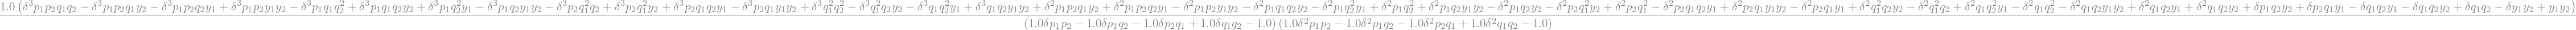

In [20]:
expression[0].factor()

**check the written mathematics**

In [21]:
r_1, r_2 = sym.symbols("r_1, r_2")
r_1_bar, r_2_bar = sym.symbols(r"\bar{r_1}, \bar{r_2}")

y_1_bar, y_2_bar = sym.symbols(r"\bar{y_1}, \bar{y_2}")
p_1_bar, q_2_bar = sym.symbols(r"\bar{p_1}, \bar{p_2}")
q_1_bar, p_2_bar = sym.symbols(r"\bar{q_1}, \bar{q_2}")

In [22]:
def get_steady_state_r(player, opponent, delta):

    r_1 = player[1] - player[2]
    r_2 = opponent[1] - opponent[2]

    first_term = (1 - delta) * (
        (player[0] * opponent[0]) / (1 - delta ** 2 * r_1 * r_2)
    )

    second_term_numerator = (
        player[2] + r_1 * ((1 - delta) * opponent[0] + d * opponent[2])
    ) * (opponent[2] + r_2 * ((1 - d) * player[0] + d * player[2]))
    second_term_denominator = (1 - delta * r_1 * r_2) * (1 - delta ** 2 * r_1 * r_2)

    return first_term + delta * (second_term_numerator / second_term_denominator)

In [23]:
player = s_one
opponent = s_two
delta = d

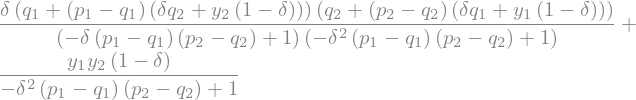

In [24]:
u_R = get_steady_state_r(s_one, s_two, d)
u_R

In [25]:
get_steady_state_r((1, 0, 0), (1, 0, 0), delta=0)

In [26]:
def get_steady_state_s(player, opponent, delta):

    r_1 = player[1] - player[2]
    r_2 = opponent[1] - opponent[2]

    first_term = (1 - delta) * (
        (player[0] * (1 - opponent[0])) / (1 - delta ** 2 * r_1 * r_2)
    )

    second_term_numerator = (
        player[2] + r_1 * ((1 - delta) * opponent[0] + d * opponent[2])
    ) * ((1 - opponent[2]) + (-r_2) * ((1 - d) * player[0] + d * player[1]))
    second_term_denominator = (1 - delta * r_1 * r_2) * (1 - delta ** 2 * r_1 * r_2)

    return first_term + delta * (second_term_numerator / second_term_denominator)

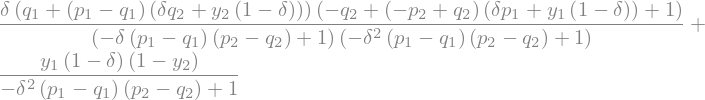

In [27]:
u_S = get_steady_state_s(s_one, s_two, d)
u_S

In [28]:
get_steady_state_s((1, 0, 0), (0, 0, 0), delta=0)

In [29]:
def get_steady_state_t(player, opponent, delta):

    r_1 = player[1] - player[2]
    r_2 = opponent[1] - opponent[2]

    first_term = (1 - delta) * (
        ((1 - player[0]) * opponent[0]) / (1 - delta ** 2 * r_1 * r_2)
    )

    second_term_numerator = (
        (1 - player[2]) + (-r_1) * ((1 - delta) * opponent[0] + d * opponent[1])
    ) * (opponent[2] + r_2 * ((1 - d) * player[0] + d * player[2]))
    second_term_denominator = (1 - delta * r_1 * r_2) * (1 - delta ** 2 * r_1 * r_2)

    return first_term + delta * (second_term_numerator / second_term_denominator)

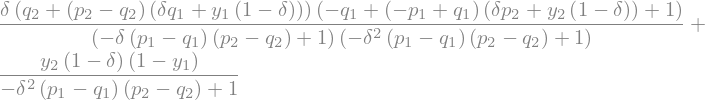

In [30]:
u_T = get_steady_state_t(s_one, s_two, d)
u_T

In [31]:
get_steady_state_t((0, 0, 0), (1, 0, 0), delta=0)

In [32]:
def get_steady_state_p(player, opponent, delta):

    r_1 = player[1] - player[2]
    r_2 = opponent[1] - opponent[2]

    first_term = (1 - delta) * (
        ((1 - player[0]) * (1 - opponent[0])) / (1 - delta ** 2 * r_1 * r_2)
    )

    second_term_numerator = (
        (1 - player[2]) + (-r_1) * ((1 - delta) * opponent[0] + d * opponent[1])
    ) * ((1 - opponent[2]) + (-r_2) * ((1 - d) * player[0] + d * player[1]))
    second_term_denominator = (1 - delta * r_1 * r_2) * (1 - delta ** 2 * r_1 * r_2)

    return first_term + delta * (second_term_numerator / second_term_denominator)

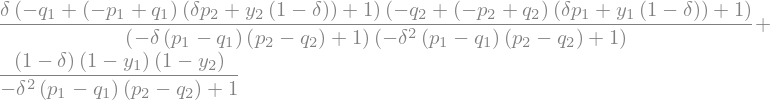

In [33]:
u_P = get_steady_state_p(s_one, s_two, d)
u_P

In [34]:
get_steady_state_p((0, 0, 0), (0, 0, 0), delta=0)

In [35]:
(u_T - expression[2]).simplify()

In [36]:
(u_R - expression[0]).simplify()

In [37]:
(expression[1] - u_S).factor()

In [38]:
(u_P - expression[3]).simplify()

In [129]:
def adopting_probability(
    utility_of_learner, utility_of_role_model, strength_of_selection
):
    if utility_of_learner == 0 and utility_of_role_model == 0:
        return 0
    return 1 / (
        1
        + sym.exp(-strength_of_selection * (utility_of_role_model - utility_of_learner))
    )

In [107]:
propability_of_adopting_role_model_strategy(0, 5, 1)

In [108]:
def get_probability_of_receving_payoffs(
    player, opponent, player_state, opponent_state, N, k, delta
):

    first_term = (1 / (N - 1)) * player_state(player, opponent, delta)

    second_term_case_one = (
        ((k - 1) / (N - 2))
        * ((k - 2) / (N - 3))
        * player_state(player, opponent, delta)
        * opponent_state(opponent, opponent, delta)
    )
    second_term_case_two = (
        ((k - 1) / (N - 2))
        * ((N - k - 1) / (N - 3))
        * player_state(player, opponent, delta)
        * opponent_state(opponent, player, delta)
    )
    second_term_case_three = (
        ((N - k - 1) / (N - 2))
        * ((k - 1) / (N - 3))
        * player_state(player, player, delta)
        * opponent_state(opponent, opponent, delta)
    )
    second_term_case_four = (
        ((N - k - 1) / (N - 2))
        * ((N - k - 2) / (N - 3))
        * player_state(player, player, delta)
        * opponent_state(opponent, player, delta)
    )

    return first_term + (1 - 1 / (N - 1)) * (
        second_term_case_one
        + second_term_case_two
        + second_term_case_three
        + second_term_case_four
    )

**Check functions for analysis of ALLD into GTFT**

In [109]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [110]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

In [111]:
get_steady_state_r(GTFT, GTFT, delta).factor()

In [112]:
get_steady_state_r(GTFT, ALLD, delta).factor()

In [113]:
get_steady_state_r(GTFT, ALLD, delta).factor()

In [114]:
get_steady_state_t(ALLD, GTFT, delta).factor()

In [115]:
(
    get_steady_state_s(GTFT, GTFT, delta).factor(),
    get_steady_state_t(GTFT, GTFT, delta).factor(),
    get_steady_state_p(GTFT, GTFT, delta).factor(),
)

In [116]:
get_steady_state_r(ALLD, GTFT, delta).factor(), get_steady_state_s(
    ALLD, GTFT, delta
).factor()

In [117]:
get_steady_state_t(ALLD, GTFT, delta).factor(), get_steady_state_p(
    ALLD, GTFT, delta
).factor()

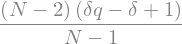

In [118]:
get_probability_of_receving_payoffs(
    player=GTFT,
    opponent=ALLD,
    player_state=get_steady_state_r,
    opponent_state=get_steady_state_t,
    N=N,
    k=1,
    delta=d,
).factor()

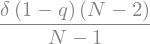

In [119]:
get_probability_of_receving_payoffs(
    player=GTFT,
    opponent=ALLD,
    player_state=get_steady_state_r,
    opponent_state=get_steady_state_p,
    N=N,
    k=1,
    delta=d,
).factor().collect(1 - q)

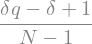

In [120]:
get_probability_of_receving_payoffs(
    player=GTFT,
    opponent=ALLD,
    player_state=get_steady_state_s,
    opponent_state=get_steady_state_t,
    N=N,
    k=1,
    delta=d,
).factor()

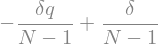

In [121]:
get_probability_of_receving_payoffs(
    player=GTFT,
    opponent=ALLD,
    player_state=get_steady_state_p,
    opponent_state=get_steady_state_p,
    N=N,
    k=1,
    delta=d,
).expand()

In [122]:
u_one = itertools.product(
    [get_steady_state_r, get_steady_state_s, get_steady_state_t, get_steady_state_p],
    repeat=2,
)

In [167]:
def probability_mutant_increases(player, opponent, N, k, delta, beta):

    states = itertools.product(
        [
            get_steady_state_r,
            get_steady_state_s,
            get_steady_state_t,
            get_steady_state_p,
        ],
        repeat=2,
    )
    
    payoffs = itertools.product(
        [
            R,
            S,
            T,
            P
        ],
        repeat=2,
    )

    sum_ = sum(
        [
            get_probability_of_receving_payoffs(
                player, opponent, state[0], state[1], N, k, delta
            )
            * adopting_probability(payoff[1], payoff[0], beta)
            for state, payoff in zip(states, payoffs)
        ]
    )
    return ((N - k) / N) * (k / N) * sum_



In [168]:
def probability_mutant_descreases(player, opponent, N, k, delta, beta):

    states = itertools.product(
        [
            get_steady_state_r,
            get_steady_state_s,
            get_steady_state_t,
            get_steady_state_p,
        ],
        repeat=2,
    )
    
    payoffs = itertools.product(
        [
            R,
            S,
            T,
            P
        ],
        repeat=2,
    )
    sum_ = sum(
        [
            get_probability_of_receving_payoffs(
                player, opponent, state[0], state[1], N, k, delta
            )
            * adopting_probability(payoff[0], payoff[1], beta)
            for state, payoff in zip(states, payoffs)
        ]
    )
    return ((N - k) / N) * (k / N) * sum_

In [169]:
R, S, T, P = sym.symbols('R, S, T, P')

In [170]:
b = sym.symbols('beta')
b

In [177]:
expr = (probability_mutant_increases(GTFT, ALLD, N, k=1, delta=d, beta=b) / probability_mutant_descreases(GTFT, ALLD, N, k=1, delta=d, beta=b))


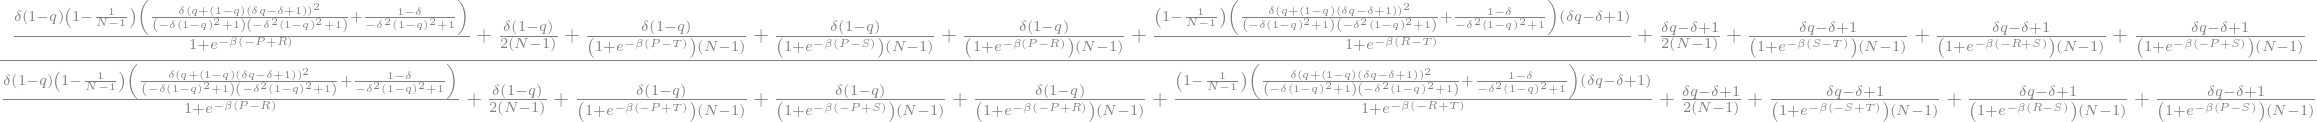

In [182]:
expr